## Correlation Between Different Models

In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.special import softmax

from tqdm import tqdm_notebook as tqdm

#### Load Test Predictions of All Models

In [2]:
df = pd.DataFrame()

for file in tqdm(glob('../../logs-cil-text/*/test_with_logits.csv')):
    temp_ = pd.read_csv(file)
    temp_[['NegativeProbs', 'PositiveProbs']] = temp_[['NegativeLogits', 
                                                       'PositiveLogits']].apply(lambda x: softmax(x), axis=1)
    df[os.path.basename(os.path.dirname(file))] = temp_['PositiveProbs']
    
df.head()

,bertweet-soft-pre-bs32-26-07-2020,bertweet-pre-soft9188-wme3-30-07-2020,roberta-mt-02-07-2020,roberta-large-28-06-2020,bertweet-pre-softelectra-wme3-29-07-2020,bertweet-oldsoft-warmup-e3-28-07-2020,xlnet-03-07-2020,roberta-custom-head-02-07-2020,xlnet-large-07-07-2020,bertweet-soft-swa-25-07-2020,...,electra-large-21-07-2020,bertweet-soft-20-07-2020,electra-04-07-2020,bertweet-soft-pre-26-07-2020,bertweet-30-06-2020,roberta-25-06-2020,bert-28-06-2020,roberta-adapter-30-06-2020,xlm-roberta-05-07-2020,bertweet-nopre-oldsoft-wme3-29-07-2020
0,0.000240,0.000446,0.000333,0.000844,0.000411,0.000337,0.000218,0.000001,0.000379,0.000262,...,0.000172,0.000221,0.000014,0.000265,0.000228,0.000251,0.000112,0.000794,0.000247,0.000365
1,0.094005,0.214533,0.035059,0.052601,0.193737,0.205648,0.080060,0.074271,0.090488,0.069226,...,0.159883,0.093954,0.044834,0.141375,0.096136,0.040377,0.101277,0.094450,0.269985,0.116978
2,0.373295,0.421784,0.786523,0.911191,0.394040,0.327736,0.153252,0.890363,0.073157,0.331393,...,0.825521,0.417556,0.064874,0.348336,0.301935,0.859658,0.261689,0.088189,0.078499,0.555682
3,0.970681,0.969760,0.947906,0.989840,0.974552,0.986132,0.942900,0.976295,0.947758,0.986679,...,0.980537,0.991729,0.996056,0.978766,0.989347,0.982014,0.972031,0.854056,0.901735,0.992124
4,0.005600,0.006850,0.002245,0.020655,0.009039,0.007097,0.005524,0.003115,0.008128,0.002764,...,0.004562,0.001601,0.000898,0.004383,0.001581,0.004853,0.008019,0.002792,0.007341,0.002676


#### Plot Correlation

In [3]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

df.corr()

,bertweet-soft-pre-bs32-26-07-2020,bertweet-pre-soft9188-wme3-30-07-2020,roberta-mt-02-07-2020,roberta-large-28-06-2020,bertweet-pre-softelectra-wme3-29-07-2020,bertweet-oldsoft-warmup-e3-28-07-2020,xlnet-03-07-2020,roberta-custom-head-02-07-2020,xlnet-large-07-07-2020,bertweet-soft-swa-25-07-2020,roberta-soft-19-07-2020,electra-large-21-07-2020,bertweet-soft-20-07-2020,electra-04-07-2020,bertweet-soft-pre-26-07-2020,bertweet-30-06-2020,roberta-25-06-2020,bert-28-06-2020,roberta-adapter-30-06-2020,xlm-roberta-05-07-2020,bertweet-nopre-oldsoft-wme3-29-07-2020
bertweet-soft-pre-bs32-26-07-2020,1.000000,0.991907,0.952801,0.948933,0.990411,0.993704,0.945899,0.953715,0.941760,0.982802,0.960412,0.959699,0.982767,0.946847,0.996225,0.982235,0.954365,0.941875,0.926228,0.940358,0.979289
bertweet-pre-soft9188-wme3-30-07-2020,0.991907,1.000000,0.960117,0.958108,0.996916,0.995817,0.954253,0.962741,0.952395,0.982120,0.967968,0.967355,0.982318,0.952395,0.993184,0.981299,0.962527,0.952355,0.941094,0.950899,0.985414
roberta-mt-02-07-2020,0.952801,0.960117,1.000000,0.954010,0.963592,0.954895,0.958541,0.982142,0.948515,0.946765,0.984077,0.960389,0.945226,0.955724,0.951466,0.943702,0.982524,0.953654,0.942197,0.951481,0.948372
roberta-large-28-06-2020,0.948933,0.958108,0.954010,1.000000,0.960548,0.952515,0.946260,0.955681,0.957402,0.946597,0.960781,0.958344,0.945649,0.941595,0.949387,0.944602,0.955666,0.940580,0.926125,0.936317,0.949742
bertweet-pre-softelectra-wme3-29-07-2020,0.990411,0.996916,0.963592,0.960548,1.000000,0.996577,0.957202,0.966077,0.954717,0.982547,0.971373,0.970087,0.981563,0.954966,0.992217,0.980480,0.966077,0.955116,0.944956,0.953127,0.984754
bertweet-oldsoft-warmup-e3-28-07-2020,0.993704,0.995817,0.954895,0.952515,0.996577,1.000000,0.948031,0.956839,0.945845,0.983722,0.963002,0.962846,0.983273,0.947156,0.996505,0.982397,0.956945,0.945164,0.932476,0.943801,0.984841
xlnet-03-07-2020,0.945899,0.954253,0.958541,0.946260,0.957202,0.948031,1.000000,0.960149,0.951269,0.937711,0.962361,0.951392,0.935477,0.949399,0.945982,0.933953,0.960144,0.954649,0.940221,0.955259,0.938030
roberta-custom-head-02-07-2020,0.953715,0.962741,0.982142,0.955681,0.966077,0.956839,0.960149,1.000000,0.951456,0.949473,0.989464,0.960705,0.948399,0.954984,0.953659,0.946864,0.990172,0.958270,0.952932,0.955381,0.951880
xlnet-large-07-07-2020,0.941760,0.952395,0.948515,0.957402,0.954717,0.945845,0.951269,0.951456,1.000000,0.938349,0.954383,0.957239,0.935663,0.941425,0.943046,0.934407,0.950984,0.944129,0.934004,0.943826,0.939683
bertweet-soft-swa-25-07-2020,0.982802,0.982120,0.946765,0.946597,0.982547,0.983722,0.937711,0.949473,0.938349,1.000000,0.955372,0.954903,0.996154,0.938405,0.983312,0.995550,0.949152,0.936549,0.924981,0.935351,0.993293


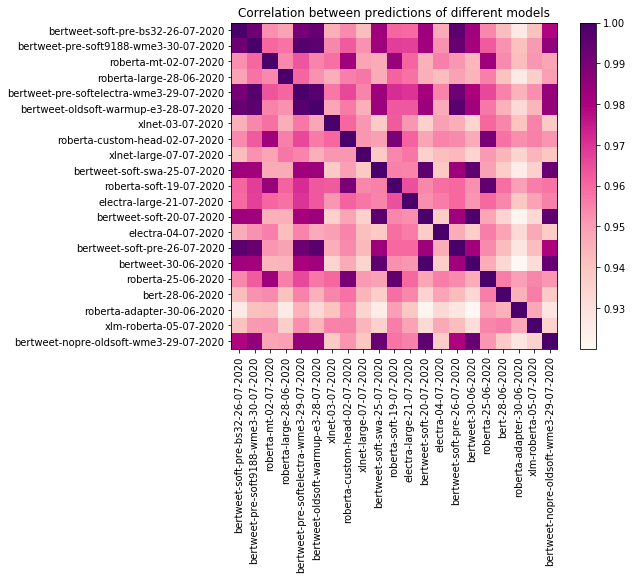

In [4]:
FIGSIZE = (8, 6)

plt.figure(figsize=FIGSIZE)
plt.imshow(df.corr(), cmap='RdPu')
plt.xticks(range(len(df.columns)), df.columns ,rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Correlation between predictions of different models')
plt.colorbar()
plt.show()

#### Weighted Linear Ensemble

I have manually tuned the weights by looking at Kaggle public LB scores and correlation plot

In [5]:
weights = {}
for i in df.columns:
    weights[i] = 1
    
weights['bertweet-pre-softelectra-wme3-29-07-2020'] = 7
weights['electra-large-21-07-2020'] = 2
weights['roberta-large-28-06-2020'] = 5
weights['bertweet-oldsoft-warmup-e3-28-07-2020'] = 2
weights

{'bertweet-soft-pre-bs32-26-07-2020': 1,
 'bertweet-pre-soft9188-wme3-30-07-2020': 1,
 'roberta-mt-02-07-2020': 1,
 'roberta-large-28-06-2020': 5,
 'bertweet-pre-softelectra-wme3-29-07-2020': 7,
 'bertweet-oldsoft-warmup-e3-28-07-2020': 2,
 'xlnet-03-07-2020': 1,
 'roberta-custom-head-02-07-2020': 1,
 'xlnet-large-07-07-2020': 1,
 'bertweet-soft-swa-25-07-2020': 1,
 'roberta-soft-19-07-2020': 1,
 'electra-large-21-07-2020': 2,
 'bertweet-soft-20-07-2020': 1,
 'electra-04-07-2020': 1,
 'bertweet-soft-pre-26-07-2020': 1,
 'bertweet-30-06-2020': 1,
 'roberta-25-06-2020': 1,
 'bert-28-06-2020': 1,
 'roberta-adapter-30-06-2020': 1,
 'xlm-roberta-05-07-2020': 1,
 'bertweet-nopre-oldsoft-wme3-29-07-2020': 1}

In [6]:
den = np.sum(list(weights.values()))

ensemble_preds = np.zeros(df.shape[0])

for name, wt in weights.items():
    ensemble_preds += df[name]*wt/den
    
sub = pd.read_csv('../../logs-cil-text/roberta-25-06-2020/submission.csv')
sub['Prediction'] = ensemble_preds
sub.head()

,Id,Prediction
0,1,0.000390
1,2,0.123283
2,3,0.498833
3,4,0.972371
4,5,0.007932


In [7]:
sub['Prediction'] = sub['Prediction'].apply(lambda x: 1 if x >= 0.5 else -1)
sub.to_csv('../../logs-cil-text/ensemble/submission.csv', index=False)

#### HOLA!! This achieves a score of 0.92040 on Kaggle Public LB.